<a href="https://colab.research.google.com/github/Selciya20102005/colab_projects/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading file: gender_submission.csv
Dataset Loaded Successfully!
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Missing values after cleaning:
PassengerId    0
Survived       0
dtype: int64

Summary Statistics:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000


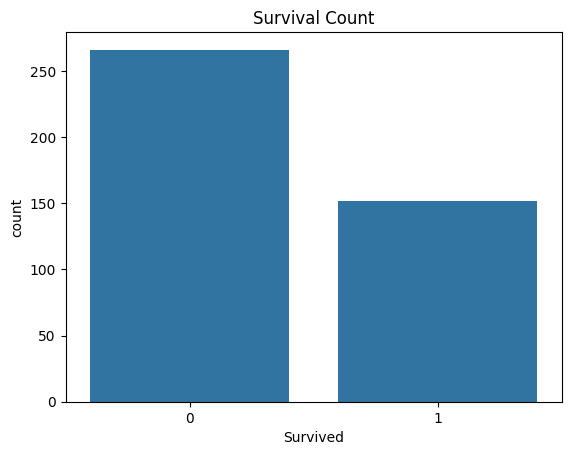

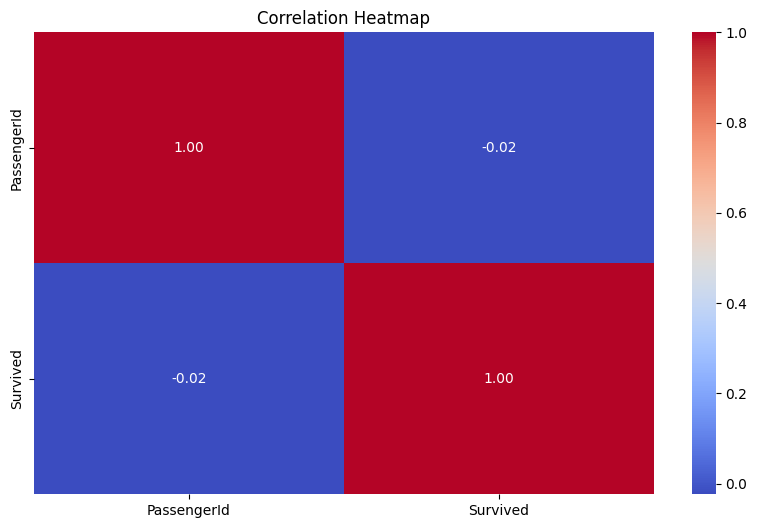

Cleaned data saved as 'cleaned_titanic.csv'


In [2]:
# Install necessary libraries
!pip install pandas matplotlib seaborn --quiet

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

# Correct ZIP file path
zip_file_path = "/content/titanic (1).zip"  # Replace with the correct ZIP file name
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Automatically get the first CSV file in the ZIP (ensure it's a CSV)
    file_name = [f for f in z.namelist() if f.endswith('.csv')][0]
    print(f"Loading file: {file_name}")
    with z.open(file_name) as f:
        df = pd.read_csv(f)

# Display the first few rows of the dataset
print("Dataset Loaded Successfully!")
print(df.head())

# Data Cleaning
# Handle missing values for 'Age' and 'Embarked'
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)
else:
    print("Warning: 'Age' column not found in the dataset.")

if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
else:
    print("Warning: 'Embarked' column not found in the dataset.")

# Drop 'Cabin' column if it exists
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizations
# 1. Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# 2. Age Distribution
if 'Age' in df.columns:
    sns.histplot(data=df, x='Age', bins=20, kde=True)
    plt.title('Age Distribution')
    plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Survival by Passenger Class
if 'Pclass' in df.columns:
    sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
    plt.title('Survival by Passenger Class')
    plt.show()

# 5. Survival by Gender
if 'Sex' in df.columns:
    sns.barplot(data=df, x='Sex', y='Survived', ci=None)
    plt.title('Survival by Gender')
    plt.show()

# 6. Survival by Embarkation Point
if 'Embarked' in df.columns:
    sns.barplot(data=df, x='Embarked', y='Survived', ci=None)
    plt.title('Survival by Embarkation Point')
    plt.show()

# Save the cleaned data
df.to_csv("cleaned_titanic.csv", index=False)
print("Cleaned data saved as 'cleaned_titanic.csv'")




In [3]:
# Check the column names and ensure there are no extra spaces or issues
print("Columns in the dataset:")
print(df.columns)

# If 'Pclass' column exists, continue the analysis
if 'Pclass' in df.columns:
    sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
    plt.title('Survival by Passenger Class')
    plt.show()
else:
    print("Error: 'Pclass' column is missing or incorrectly named.")


Columns in the dataset:
Index(['PassengerId', 'Survived'], dtype='object')
Error: 'Pclass' column is missing or incorrectly named.


In [4]:
# Load 'train.csv' from the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as z:
    # Explicitly open the 'train.csv' file
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

# Check the columns to ensure the correct dataset is loaded
print("Columns in the loaded dataset:")
print(df.columns)

# Inspect the first few rows of the dataset
print(df.head())


Columns in the loaded dataset:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71

<ipython-input-5-e03ecf986324>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing 'Age' values with the median
<ipython-input-5-e03ecf986324>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'd


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   

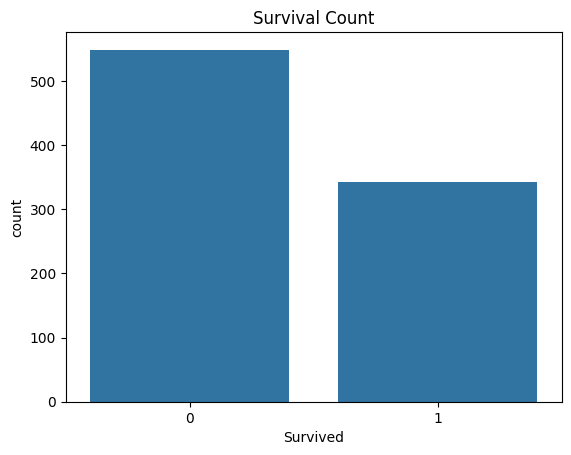

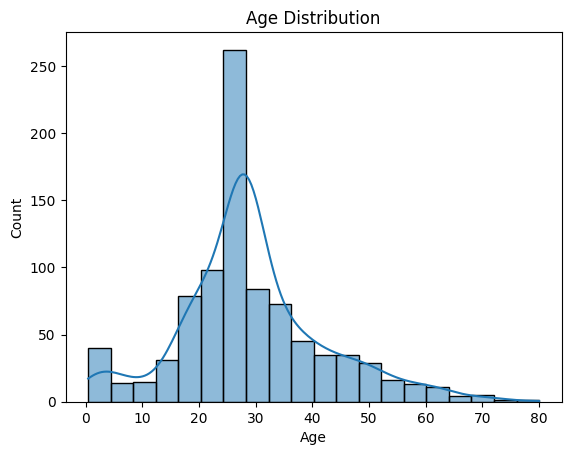

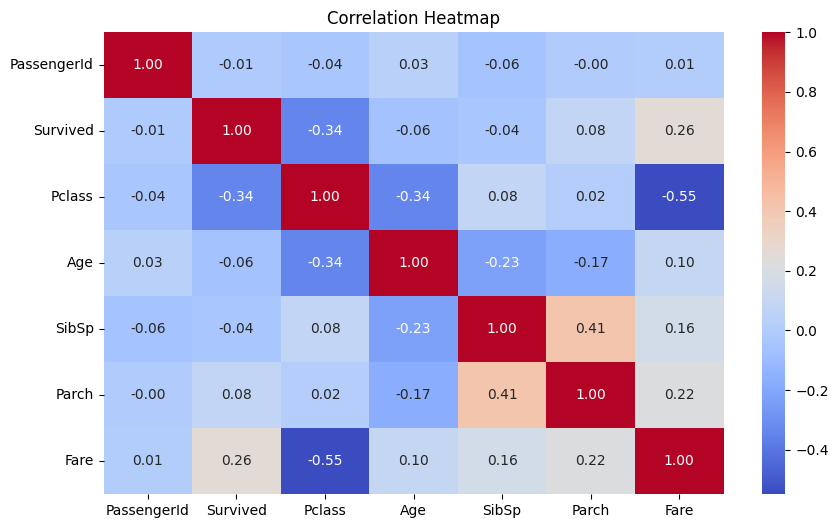

<ipython-input-5-e03ecf986324>:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', ci=None)


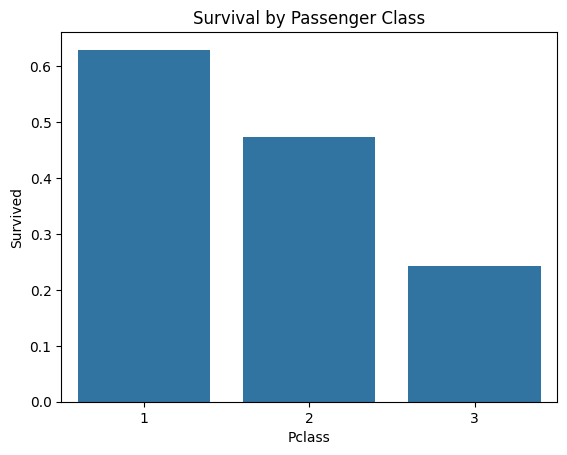

<ipython-input-5-e03ecf986324>:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ci=None)


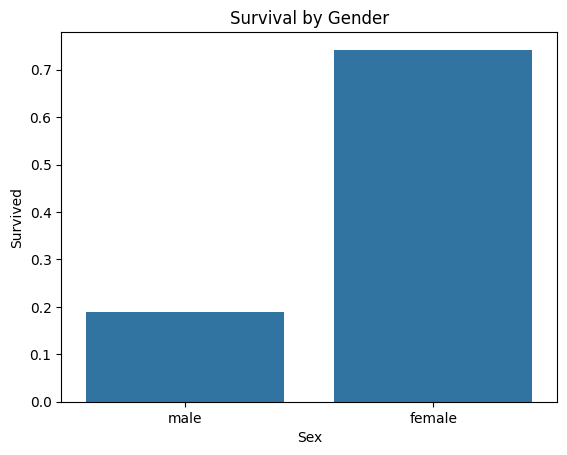

<ipython-input-5-e03ecf986324>:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ci=None)


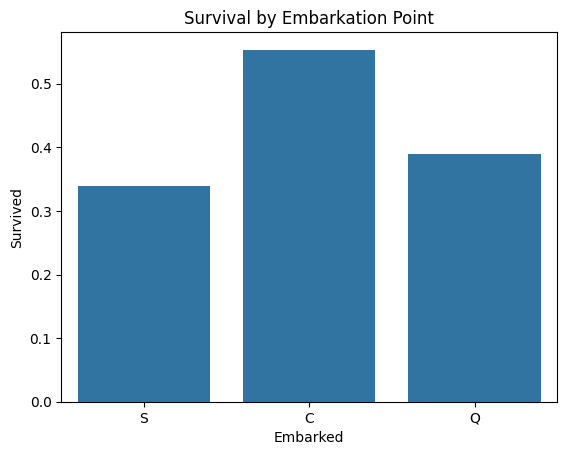

Cleaned data saved as 'cleaned_titanic.csv'


In [5]:
# Data Cleaning
# Handle missing values for 'Age' and 'Embarked'
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing 'Age' values with the median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing 'Embarked' values with the mode (most common)

# Drop 'Cabin' column if it exists
df.drop(columns=['Cabin'], inplace=True)

# Check for missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizations
# 1. Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.show()

# 2. Age Distribution
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# 3. Correlation Heatmap (only numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns only
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 4. Survival by Passenger Class
sns.barplot(data=df, x='Pclass', y='Survived', ci=None)
plt.title('Survival by Passenger Class')
plt.show()

# 5. Survival by Gender
sns.barplot(data=df, x='Sex', y='Survived', ci=None)
plt.title('Survival by Gender')
plt.show()

# 6. Survival by Embarkation Point
sns.barplot(data=df, x='Embarked', y='Survived', ci=None)
plt.title('Survival by Embarkation Point')
plt.show()

# Save the cleaned data
df.to_csv("cleaned_titanic.csv", index=False)
print("Cleaned data saved as 'cleaned_titanic.csv'")
